In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Universities.csv to Copy of Universities (1).csv


In [23]:
univ = pd.read_csv("Copy of Universities.csv")

In [24]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [25]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [26]:
# Normalized data frame (considering numerical part of data)
df_norm = norm_func(univ.iloc[:,1:])

In [27]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


#Dendrogram

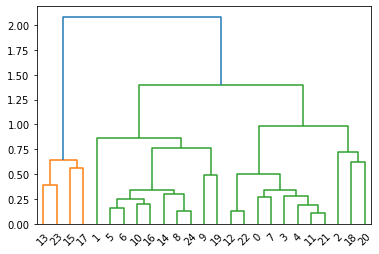

In [28]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [29]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [30]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [31]:
# Save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters = pd.DataFrame(y_hc, columns=['Clusters])

In [32]:
y_hc

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0])

In [33]:
univ['h_clusterid'] = y_hc

In [34]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [35]:
univ1 = univ.sort_values("h_clusterid")
univ1.iloc[:,[0,-1]]

,Univ,h_clusterid
24,Yale,0
14,Princeton,0
10,MIT,0
9,JohnsHopkins,0
16,Stanford,0
19,UChicago,0
8,Harvard,0
5,Dartmouth,0
6,Duke,0
23,UWisconsin,1


In [36]:
u0 = univ[univ.h_clusterid==0]
u0

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
19,UChicago,1290,75,50,13,38380,87,0
24,Yale,1375,95,19,11,43514,96,0


In [37]:
u1 = univ[univ.h_clusterid==1]
u1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [38]:
u3 = univ[univ.h_clusterid==3]
u3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
7,Georgetown,1255,74,24,12,20126,92,3
11,Northwestern,1260,85,39,11,28052,89,3
12,NotreDame,1255,81,42,13,15122,94,3
21,UPenn,1285,80,36,11,27553,90,3
22,UVA,1225,77,44,14,13349,92,3


#Practice

In [39]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True).frame

In [40]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
# Normalization Function
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [50]:
# Normalized Dataframe
norm = norm_func(data.iloc[:,0:])

In [51]:
norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


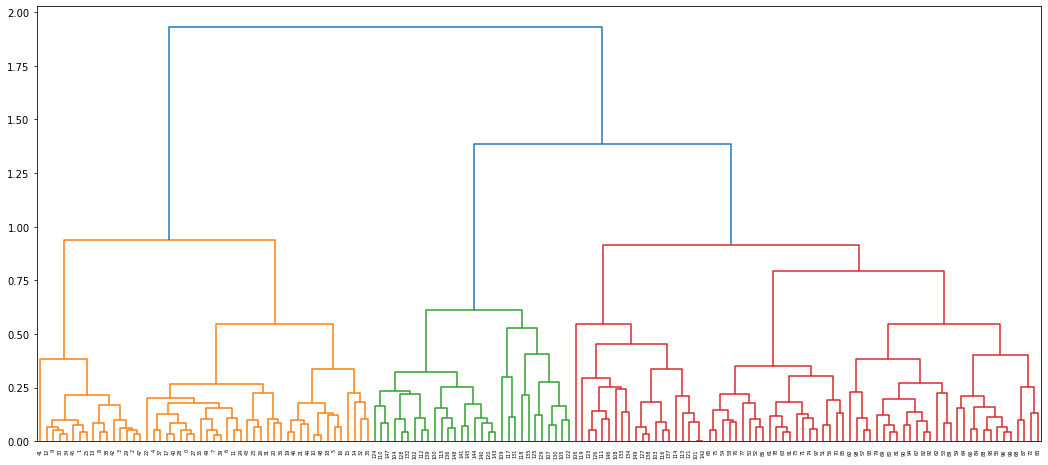

In [63]:
# Dendrogram
plt.figure(figsize=(18,8))
D = sch.dendrogram(sch.linkage(norm, method='complete'))

In [70]:
# Create Clusters
c = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [71]:
c.fit(norm)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [72]:
# Save clusters for chart
y_c = c.fit_predict(norm)

In [74]:
y_c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [76]:
data['clusterid'] = y_c

In [79]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterid
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [81]:
data1 = data.sort_values("clusterid")
data1.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0
...,...,...,...,...,...
125,7.2,3.2,6.0,1.8,2
104,6.5,3.0,5.8,2.2,2
128,6.4,2.8,5.6,2.1,2
130,7.4,2.8,6.1,1.9,2


In [82]:
d0 = data[data['clusterid']==0]
d0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterid
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [84]:
d1 = data[data['clusterid']==1]
d1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterid
50,7.0,3.2,4.7,1.4,1,1
51,6.4,3.2,4.5,1.5,1,1
52,6.9,3.1,4.9,1.5,1,1
53,5.5,2.3,4.0,1.3,1,1
54,6.5,2.8,4.6,1.5,1,1
...,...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,2,1
138,6.0,3.0,4.8,1.8,2,1
142,5.8,2.7,5.1,1.9,2,1
146,6.3,2.5,5.0,1.9,2,1


In [85]:
d2 = data[data['clusterid']==2]
d2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterid
100,6.3,3.3,6.0,2.5,2,2
102,7.1,3.0,5.9,2.1,2,2
104,6.5,3.0,5.8,2.2,2,2
105,7.6,3.0,6.6,2.1,2,2
107,7.3,2.9,6.3,1.8,2,2
109,7.2,3.6,6.1,2.5,2,2
110,6.5,3.2,5.1,2.0,2,2
112,6.8,3.0,5.5,2.1,2,2
115,6.4,3.2,5.3,2.3,2,2
117,7.7,3.8,6.7,2.2,2,2
